## Support Vector Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# synthetic data points
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [22]:
X,y = make_classification(n_samples=1000, n_features=2, 
    n_classes = 2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [23]:
X

array([[ 0.60103418,  1.5353525 ],
       [ 0.75594526, -1.1723519 ],
       [ 1.35447877, -0.94852841],
       ...,
       [ 2.84431506,  0.21129354],
       [-0.02587554,  1.6192578 ],
       [ 3.64147835,  0.75692519]])

In [24]:
y[:50]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0])

In [25]:
pd.DataFrame(X)[0]

0      0.601034
1      0.755945
2      1.354479
3      3.103090
4      0.753178
         ...   
995    1.713939
996    1.509473
997    2.844315
998   -0.025876
999    3.641478
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

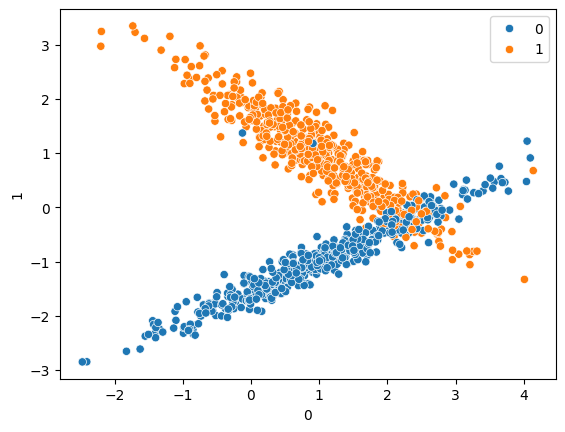

In [28]:
sns.scatterplot(x = pd.DataFrame(X)[0], 
                y = pd.DataFrame(X)[1], hue = y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=0.25, random_state=10)

In [33]:
from sklearn.svm import SVC

In [35]:
svc = SVC(kernel = 'linear')

In [36]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
y_pred = svc.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(confusion_matrix(y_test, y_pred))

[[120   0]
 [ 17 113]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       120
           1       1.00      0.87      0.93       130

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250



In [44]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes = 2,
n_redundant=0, n_clusters_per_class=2, random_state=42) # n_clusters_per_class=2

<Axes: xlabel='0', ylabel='1'>

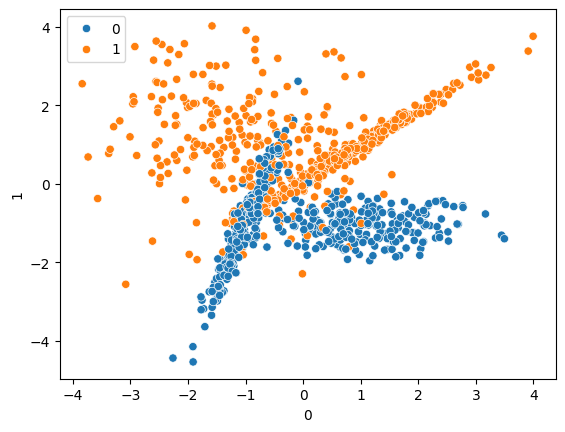

In [45]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)


In [46]:
rbf = SVC(kernel = 'rbf')
rbf.fit(X_train, y_train)


SVC()

In [47]:
y_pred =    rbf.predict(X_test)

In [48]:
print(confusion_matrix(y_test, y_pred))

[[120   0]
 [ 16 114]]


In [49]:
print(classification_report(y_test, y_pred)) 
# accuracy improved, rbf higher dimension

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       120
           1       1.00      0.88      0.93       130

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [51]:
poly = SVC(kernel = 'poly')
poly.fit(X_train, y_train)
y_pred =    poly.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[119   1]
 [ 16 114]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       120
           1       0.99      0.88      0.93       130

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250



In [52]:
sig = SVC(kernel = 'sigmoid')
sig.fit(X_train, y_train)
y_pred =    sig.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[115   5]
 [ 18 112]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       120
           1       0.96      0.86      0.91       130

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf']}

In [56]:
grid = GridSearchCV(SVC(), param_grid, cv = 5, refit = True, verbose = 3)

In [57]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [58]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [59]:
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[118   2]
 [ 14 116]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       120
           1       0.98      0.89      0.94       130

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

